# 2. Probability Distributions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from prml.distributions import (
    BetaDistribution,
    GaussianDistribution,
    GaussianMixtureDistribution,
    StudentsTDistribution)

### 2.1.1 The beta distributions

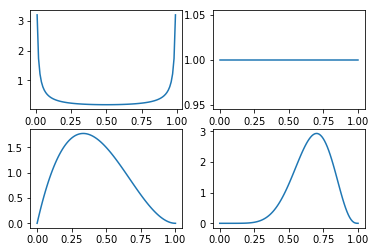

In [2]:
for i, [a, b] in enumerate([[0.1, 0.1], [1, 1], [2, 3], [8, 4]]):
    plt.subplot(2, 2, i + 1)
    beta = BetaDistribution(a, b)
    x = np.linspace(0, 1, 100)
    plt.plot(x, beta.proba(x))
plt.show()

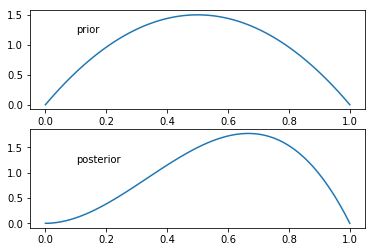

In [3]:
beta = BetaDistribution(2, 2)
plt.subplot(2, 1, 1)
plt.plot(x, beta.proba(x))
plt.annotate("prior", (0.1, 1.2))

beta.fit(n_ones=1, n_zeros=0)
plt.subplot(2, 1, 2)
plt.plot(x, beta.proba(x))
plt.annotate("posterior", (0.1, 1.2))
plt.show()

In [4]:
print("prediction with the MLE model")
beta = BetaDistribution(0, 0)
beta.fit(n_ones=1)
for i in range(100):
    print(beta.predict(), end=" ")
print("")
print("prediction with the Bayesian model")
beta = BetaDistribution(2, 2)
beta.fit(n_ones=1)
for i in range(100):
    print(beta.predict(), end=" ")

prediction with the MLE model
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 
prediction with the Bayesian model
1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0 0 0 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 0 

## 2.3 The Gaussian Distribution

mean: [ 0.79080869  0.85805324]
var:
 [[ 3.58795519 -0.41891897]
 [-0.41891897  4.38214201]]


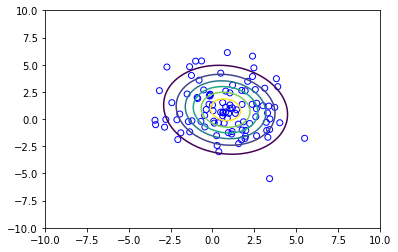

In [5]:
X = np.random.normal(loc=1., scale=2., size=(100, 2))
gaussian = GaussianDistribution()
gaussian.fit(X)
print("mean:", gaussian.mean)
print("var:\n", gaussian.var)
x, y = np.meshgrid(
    np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
p = gaussian.proba(
    np.array([x, y]).reshape(2, -1).T).reshape(100, 100)
plt.scatter(X[:, 0], X[:, 1], facecolor="none", edgecolor="b")
plt.contour(x, y, p)
plt.show()

### 2.3.7 Student's t-distribution

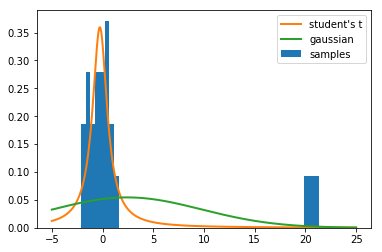

In [6]:
x = np.random.normal(size=20)
x = np.concatenate([x, np.random.normal(loc=20., size=3)])
plt.hist(x, bins=50, normed=1., label="samples")

students_t = StudentsTDistribution()
gaussian = GaussianDistribution()

gaussian.fit(x)
students_t.fit(x)

x = np.linspace(-5, 25, 1000)
plt.plot(x, students_t.proba(x), label="student's t", linewidth=2)
plt.plot(x, gaussian.proba(x), label="gaussian", linewidth=2)
plt.legend()
plt.show()

### 2.3.9 Mixture of Gaussians

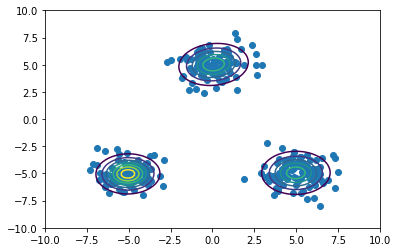

In [7]:
x1 = np.random.normal(size=(100, 2))
x1 += np.array([-5, -5])
x2 = np.random.normal(size=(100, 2))
x2 += np.array([5, -5])
x3 = np.random.normal(size=(100, 2))
x3 += np.array([0, 5])
X = np.vstack((x1, x2, x3))

model = GaussianMixtureDistribution(n_components=3)
model.fit(X, iter_max=100)

x_test, y_test = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
X_test = np.array([x_test, y_test]).reshape(2, -1).transpose()
probs = model.proba(X_test)
Probs = probs.reshape(100, 100)
plt.scatter(X[:, 0], X[:, 1])
plt.contour(x_test, y_test, Probs)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()